<a href="https://www.kaggle.com/code/mesutssmn/credit-score-classification?scriptVersionId=157589953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")
df.head(3)

/tmp/ipykernel_27/1467797676.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [3]:
pd.set_option('display.max_columns', None)
df.tail(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: object

In [8]:
df.fillna(np.mean,axis=1,inplace=True)

In [9]:
df.drop(["Name","ID","Customer_ID"],axis=1,inplace=True)

In [10]:
num_cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

df[num_cols]=df[num_cols].apply(pd.to_numeric,errors="coerce")

In [11]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [12]:
df["Age"].mean()

110.93450521244255

In [13]:
df.loc[df['Age'] <= 0, 'Age'] = 50
df.loc[df['Age'] >= 100, 'Age'] = 50

In [14]:
df["Age"].mean()

34.58995

In [15]:
df.isnull().sum()

Month                           0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [16]:
df["Monthly_Inhand_Salary"].fillna(np.mean(df["Monthly_Inhand_Salary"]),inplace=True)
df["Num_of_Delayed_Payment"].fillna(30, inplace=True)
df["Changed_Credit_Limit"].fillna(10, inplace=True)
df["Num_Credit_Inquiries"].fillna(28, inplace=True)
df["Outstanding_Debt"].fillna(1426, inplace=True)
df["Amount_invested_monthly"].fillna(195, inplace=True)
df["Monthly_Balance"].fillna(402, inplace=True)
df["Num_of_Loan"].fillna(3, inplace=True)

In [17]:
df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
30.0      9746
19.0      5327
17.0      5261
16.0      5173
10.0      5153
          ... 
2882.0       1
1534.0       1
3739.0       1
3313.0       1
2047.0       1
Name: count, Length: 699, dtype: int64

In [18]:
df.loc[df['Num_of_Loan'] < 0, 'Age'] = 3
df.loc[df['Num_of_Loan'] > 10, 'Age'] = 3

In [19]:
df["Num_of_Loan"].mean()

2.79085

In [20]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [21]:
df.isnull().sum()

Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

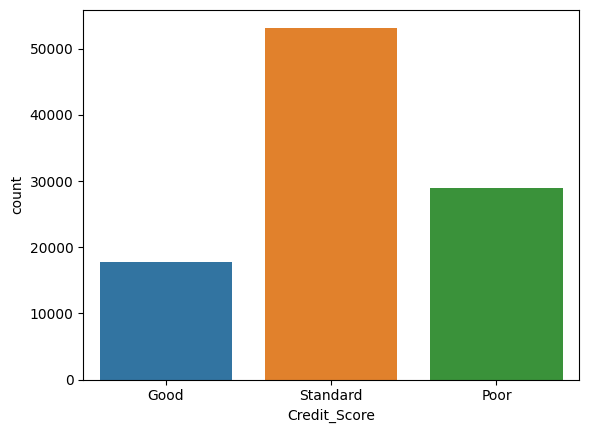

In [22]:
sns.countplot(data=df, x="Credit_Score")
plt.show()

In [23]:
df["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [24]:
df["Occupation"].replace("_______","Others",inplace=True)
df["Occupation"].unique()

array(['Scientist', 'Others', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

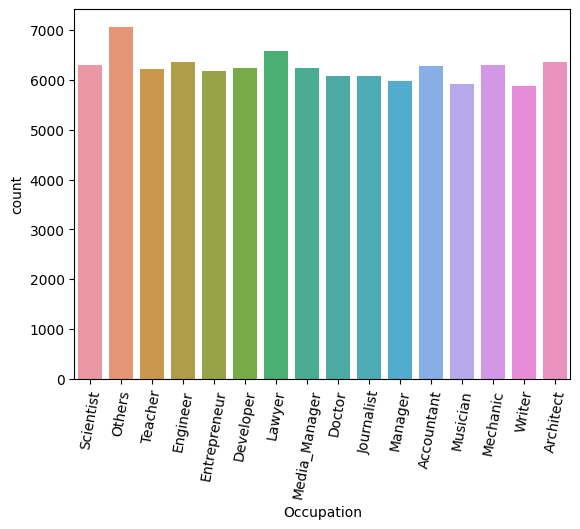

In [25]:
sns.countplot(x=df["Occupation"])
plt.xticks(rotation=80)
plt.show()

In [26]:
df["Occupation"].value_counts()

Occupation
Others           7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

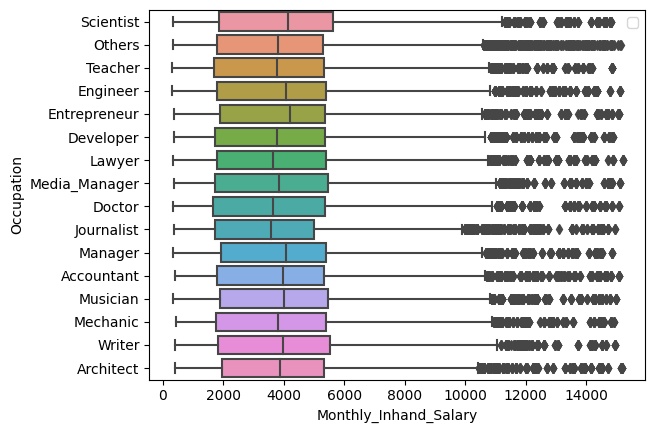

In [27]:
sns.boxplot(df,y="Occupation",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

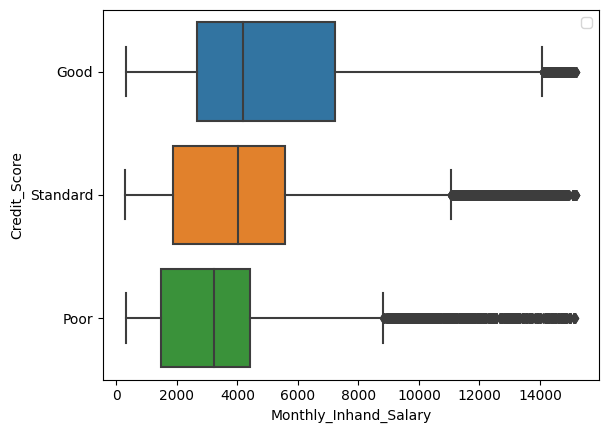

In [28]:
sns.boxplot(df,y="Credit_Score",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

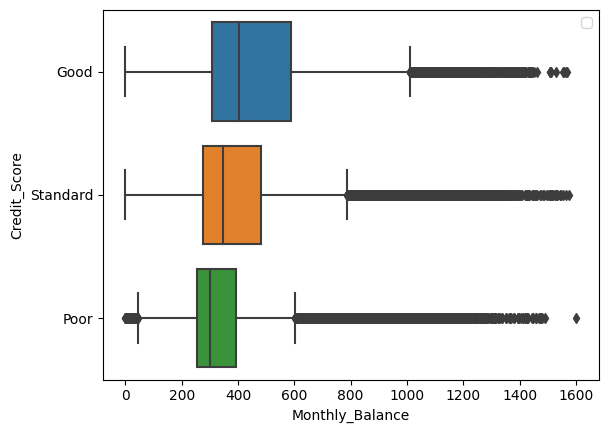

In [29]:
sns.boxplot(df,y="Credit_Score",x="Monthly_Balance")
plt.legend()
plt.show()

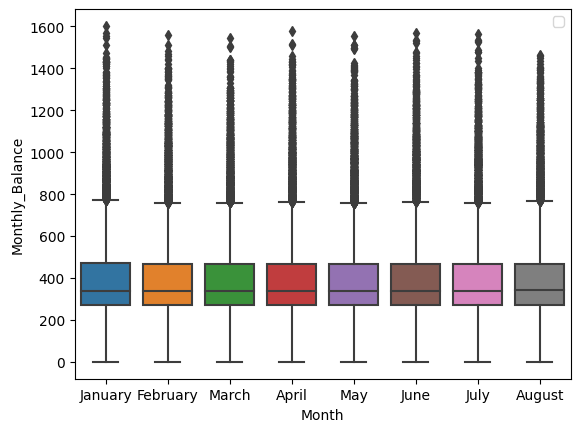

In [30]:
sns.boxplot(df,x="Month",y="Monthly_Balance")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


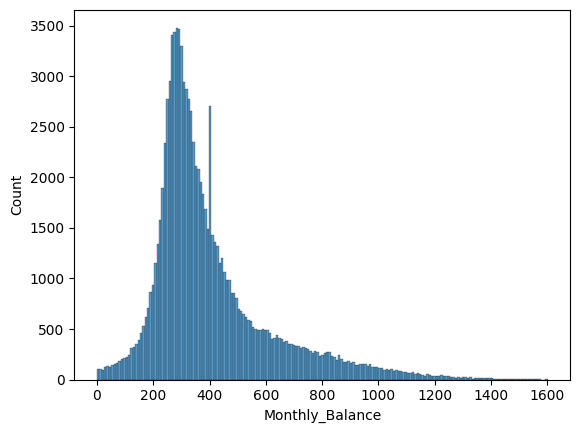

In [31]:
sns.histplot(df["Monthly_Balance"])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


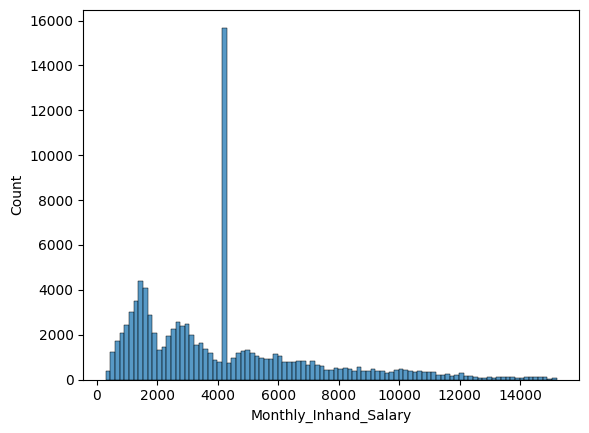

In [32]:
sns.histplot(df["Monthly_Inhand_Salary"])
plt.show()

In [33]:
#sns.pairplot(data=df)
#plt.show()

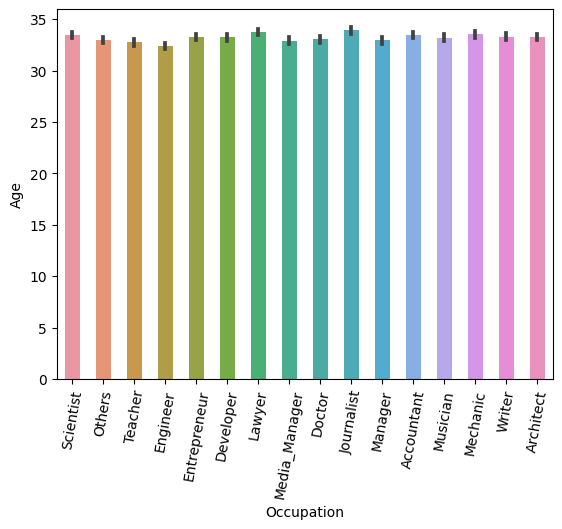

In [34]:
sns.barplot(df,x='Occupation',y='Age',width=0.5)
plt.xticks(rotation=80)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


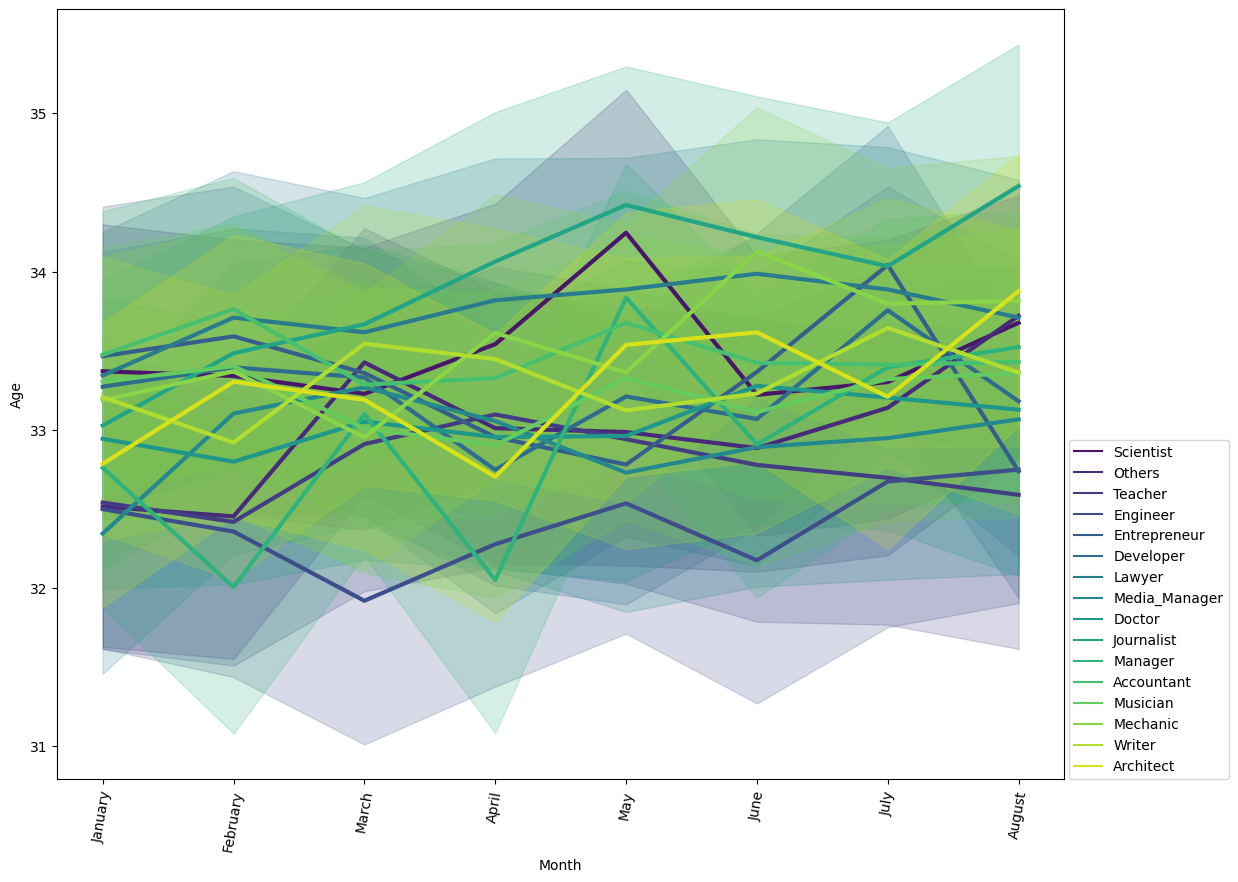

In [35]:
plt.figure(figsize=(13,10))
sns.lineplot(df,x='Month',y='Age', hue="Occupation",palette="viridis", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


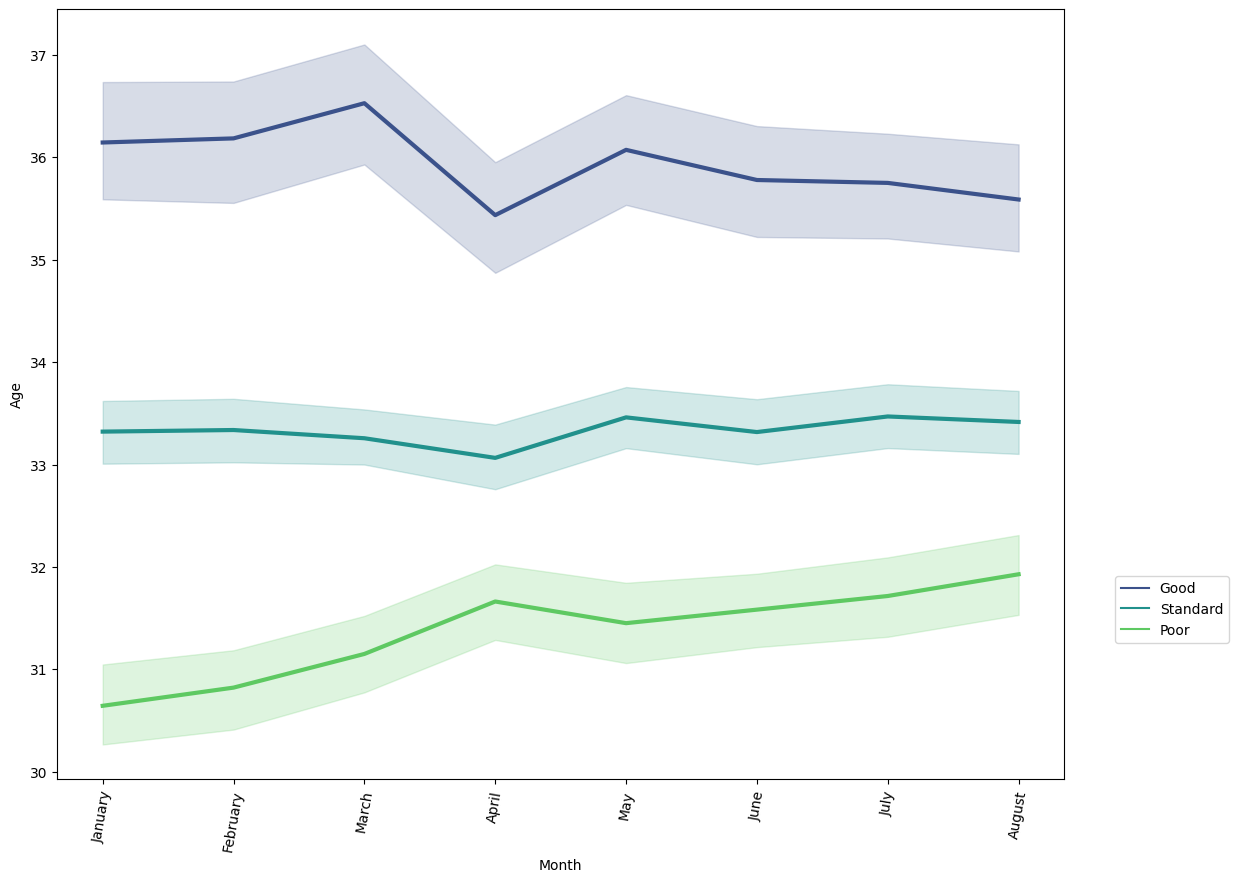

In [36]:
plt.figure(figsize=(13,10))
sns.lineplot(df,x='Month',y='Age', hue="Credit_Score",palette="viridis", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

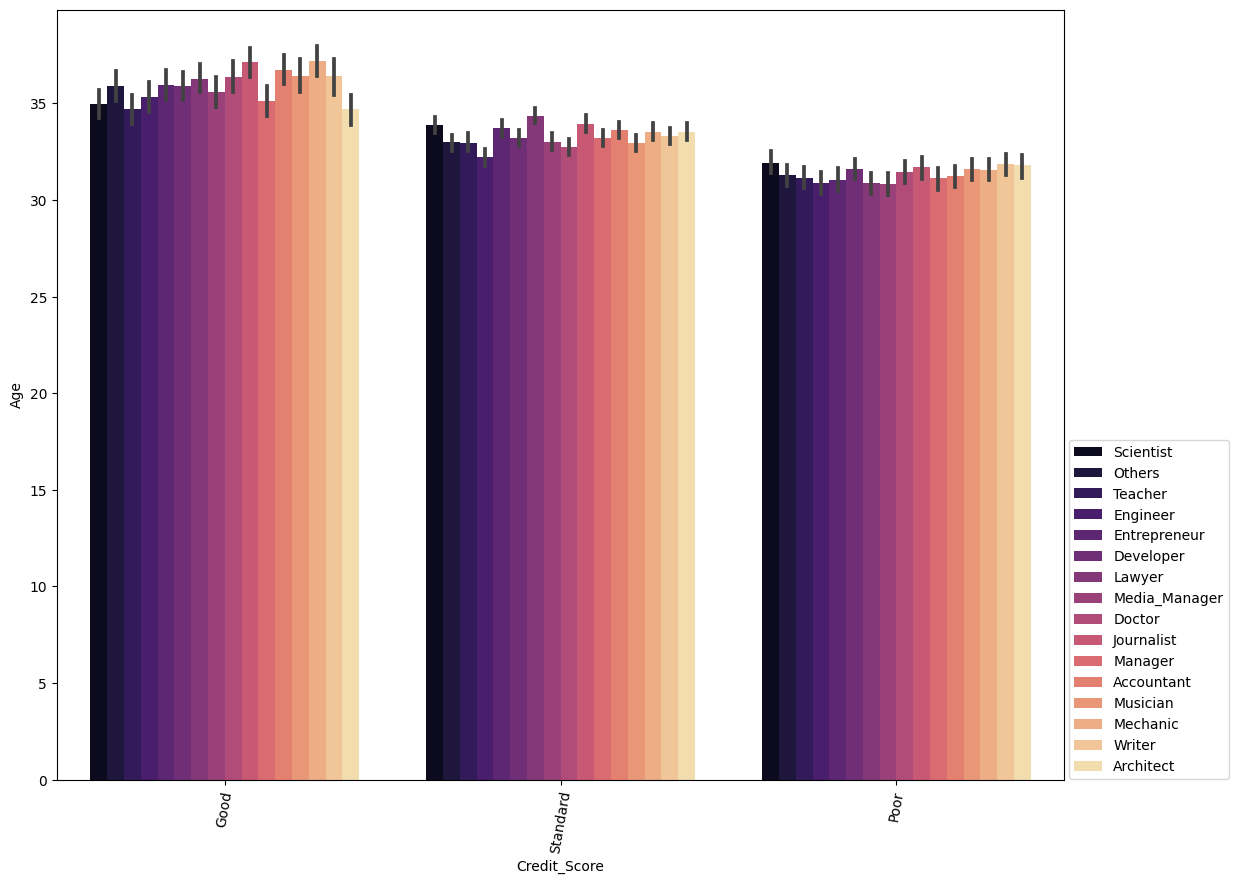

In [37]:
plt.figure(figsize=(13,10))
sns.barplot(df,x='Credit_Score',y='Age', hue="Occupation",palette="magma", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

<Axes: >

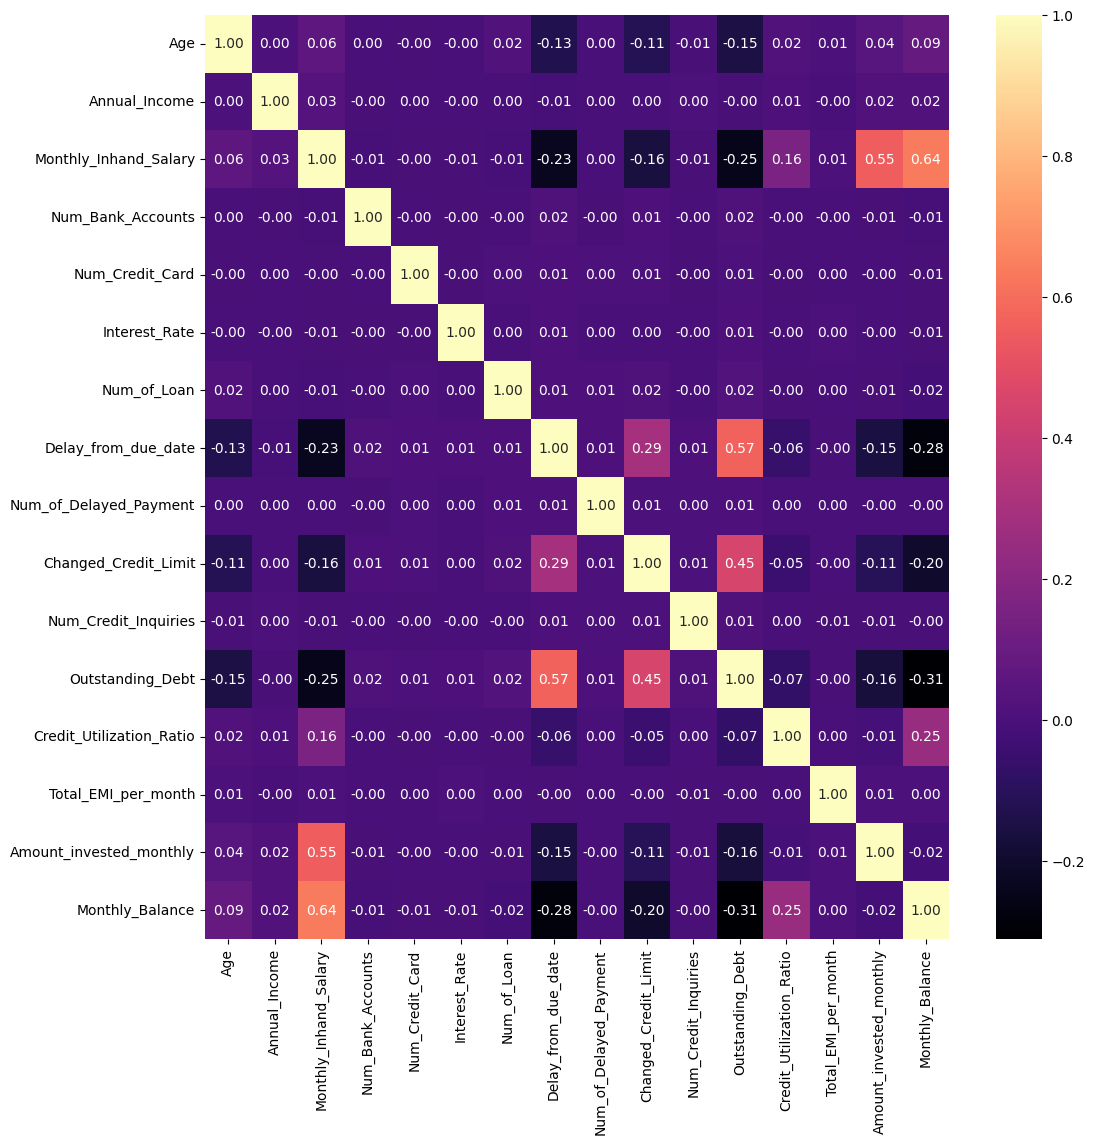

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap="magma")

In [39]:
df.head(3)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,30.0,11.27,4.0,Good,809.98,31.944960,<function mean at 0x7911e014b520>,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,50.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,10.00,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


In [40]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [41]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [42]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [43]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [44]:
df['Credit_Score'] = df['Credit_Score'].map({'Good':0,'Standard':1,'Poor':2})
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8})
df['Credit_Mix'] = df['Credit_Mix'].map({'_':0, 'Good':1, 'Standard':2, 'Bad':3})
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No':0, 'NM':0, 'Yes':1})
df['Payment_Behaviour'] = df['Payment_Behaviour'].map({'High_spent_Small_value_payments':4,
       'Low_spent_Large_value_payments':2,
       'Low_spent_Medium_value_payments':1,
       'Low_spent_Small_value_payments':0,
       'High_spent_Medium_value_payments':5, '!@9#%8':7,
       'High_spent_Large_value_payments':6})

In [45]:
dfd = pd.get_dummies(df,columns=['Occupation'],drop_first=True)

In [46]:
dfd.shape

(100000, 39)

In [47]:
dfd.head()

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Others,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,0,809.98,26.822620,22 Years and 1 Months,0,49.574949,80.415295,4,312.494089,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,23.0,821-00-0265,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,30.0,11.27,4.0,1,809.98,31.944960,<function mean at 0x7911e014b520>,0,49.574949,118.280222,2,284.629162,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3,50.0,821-00-0265,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,10.00,4.0,1,809.98,28.609352,22 Years and 3 Months,0,49.574949,81.699521,1,331.209863,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,4,23.0,821-00-0265,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,1,809.98,31.377862,22 Years and 4 Months,0,49.574949,199.458074,0,223.451310,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,5,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,30.0,11.27,4.0,1,809.98,24.797347,22 Years and 5 Months,0,49.574949,41.420153,5,341.489231,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [48]:
y = dfd['Credit_Score']
x = dfd.drop(['Credit_Score','Type_of_Loan','SSN','Credit_History_Age',
              'Num_of_Delayed_Payment'],axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=42)

In [50]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.50, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.7813

In [53]:
xgb = XGBClassifier()
xgbmodel = xgb.fit(X_train,y_train)
xgbmodel.score(X_test,y_test)

0.7508

In [54]:
lgb = LGBMClassifier()
lgbmodel = lgb.fit(X_train,y_train)
lgbmodel.score(X_test,y_test)

0.7205

In [55]:
gbc = GradientBoostingClassifier()
gbcmodel = gbc.fit(X_train,y_train)
xgbmodel.score(X_test,y_test)

0.7508

In [56]:
cbc = CatBoostClassifier()
cbcmodel = cbc.fit(X_train,y_train, verbose=False)
cbcmodel.score(X_test,y_test)

0.7405

In [57]:
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier())
pipe.fit(X_train, y_train)
Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),('RandomForestClassifier', RandomForestClassifier())])
pipe.score(X_test, y_test)

0.7806

<Axes: >

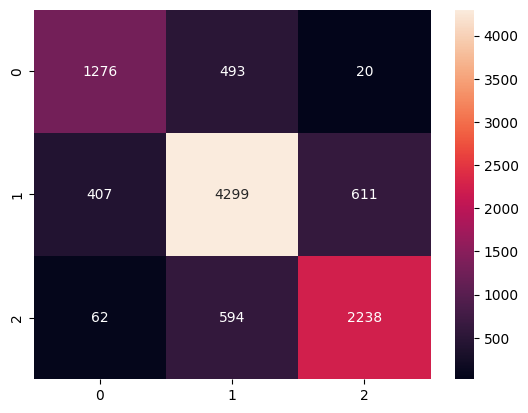

In [58]:
y_predrfc = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predrfc), annot=True, fmt='.0f')

In [59]:
rf.predict(X_test)

array([1, 1, 2, ..., 1, 0, 2])

In [60]:
X=np.asarray(X_train).astype(np.float32)
Y=np.asarray(y_train).astype(np.float32)
X_val=np.asarray(X_val).astype(np.float32)
Y_val=np.asarray(y_val).astype(np.float32)

In [61]:
import tensorflow as tf
from sklearn.metrics import classification_report

In [62]:
X.shape

(80000, 34)

In [63]:
model = tf.keras.Sequential()
input_layer = tf.keras.layers.Dense(1024, input_shape=(34,), activation="relu")

model.add(input_layer)
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
tf.keras.layers.BatchNormalization()

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(3, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [64]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [65]:
results = model.fit(X, Y, epochs = 100, callbacks=[es], validation_data=(X_val, y_val))

Epoch 1/100
2500/2500 [==============================] - 21s 4ms/step - loss: 34.0714 - accuracy: 0.5253 - val_loss: 1.0023 - val_accuracy: 0.5282
Epoch 2/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.3925 - accuracy: 0.5318 - val_loss: 1.0021 - val_accuracy: 0.5282
Epoch 3/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.0983 - accuracy: 0.5320 - val_loss: 1.0023 - val_accuracy: 0.5282
Epoch 4/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.0492 - accuracy: 0.5320 - val_loss: 1.0022 - val_accuracy: 0.5282
Epoch 5/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.0104 - accuracy: 0.5321 - val_loss: 1.0023 - val_accuracy: 0.5282
Epoch 6/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.3398 - accuracy: 0.5321 - val_loss: 1.0021 - val_accuracy: 0.5282
Epoch 7/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.0117 - accuracy: 0.5321 - val_loss: 1.0022 

In [66]:
model.evaluate(X, Y)

2500/2500 [==============================] - 5s 2ms/step - loss: 1.0023 - accuracy: 0.5322


[1.002262830734253, 0.5321875214576721]